In [2]:
#file= '2022090800_AET.nc'
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
from mpl_toolkits.basemap import Basemap

In [3]:
ds=nc.Dataset('2022090800_Day.nc')
print(ds.variables.keys())

lat= ds.variables['latitude'][:]
lon= ds.variables['longitude'][:]
data=ds.variables['RH_2maboveground'][0]
print(data)

lon0,lat0=np.meshgrid(lon,lat)
print(lat.shape,lon.shape,data.shape)
print(data.min())
print(data.max())

dict_keys(['latitude', 'longitude', 'time', 'PRES_surface', 'TMP_2maboveground', 'DPT_2maboveground', 'RH_2maboveground', 'UGRD_10maboveground', 'VGRD_10maboveground', 'APCP_surface'])
[[85.8      85.9      86.       ... 82.8      82.700005 82.5     ]
 [85.9      85.200005 85.200005 ... 82.4      82.200005 82.4     ]
 [85.9      85.1      85.       ... 82.4      82.200005 82.4     ]
 ...
 [84.4      83.200005 82.3      ... 24.6      24.7      24.800001]
 [84.5      83.4      82.700005 ... 24.5      24.7      24.800001]
 [84.5      84.       83.3      ... 24.5      24.7      24.800001]]
(1850,) (1950,) (1850, 1950)
1.0
100.0


In [8]:
data1= ds.variables['RH_2maboveground']
print(data1)

<class 'netCDF4._netCDF4.Variable'>
float32 RH_2maboveground(time, latitude, longitude)
    _FillValue: 9.999e+20
    short_name: RH_2maboveground
    long_name: Relative Humidity
    level: 2 m above ground
    units: %
unlimited dimensions: time
current shape = (25, 1850, 1950)
filling on


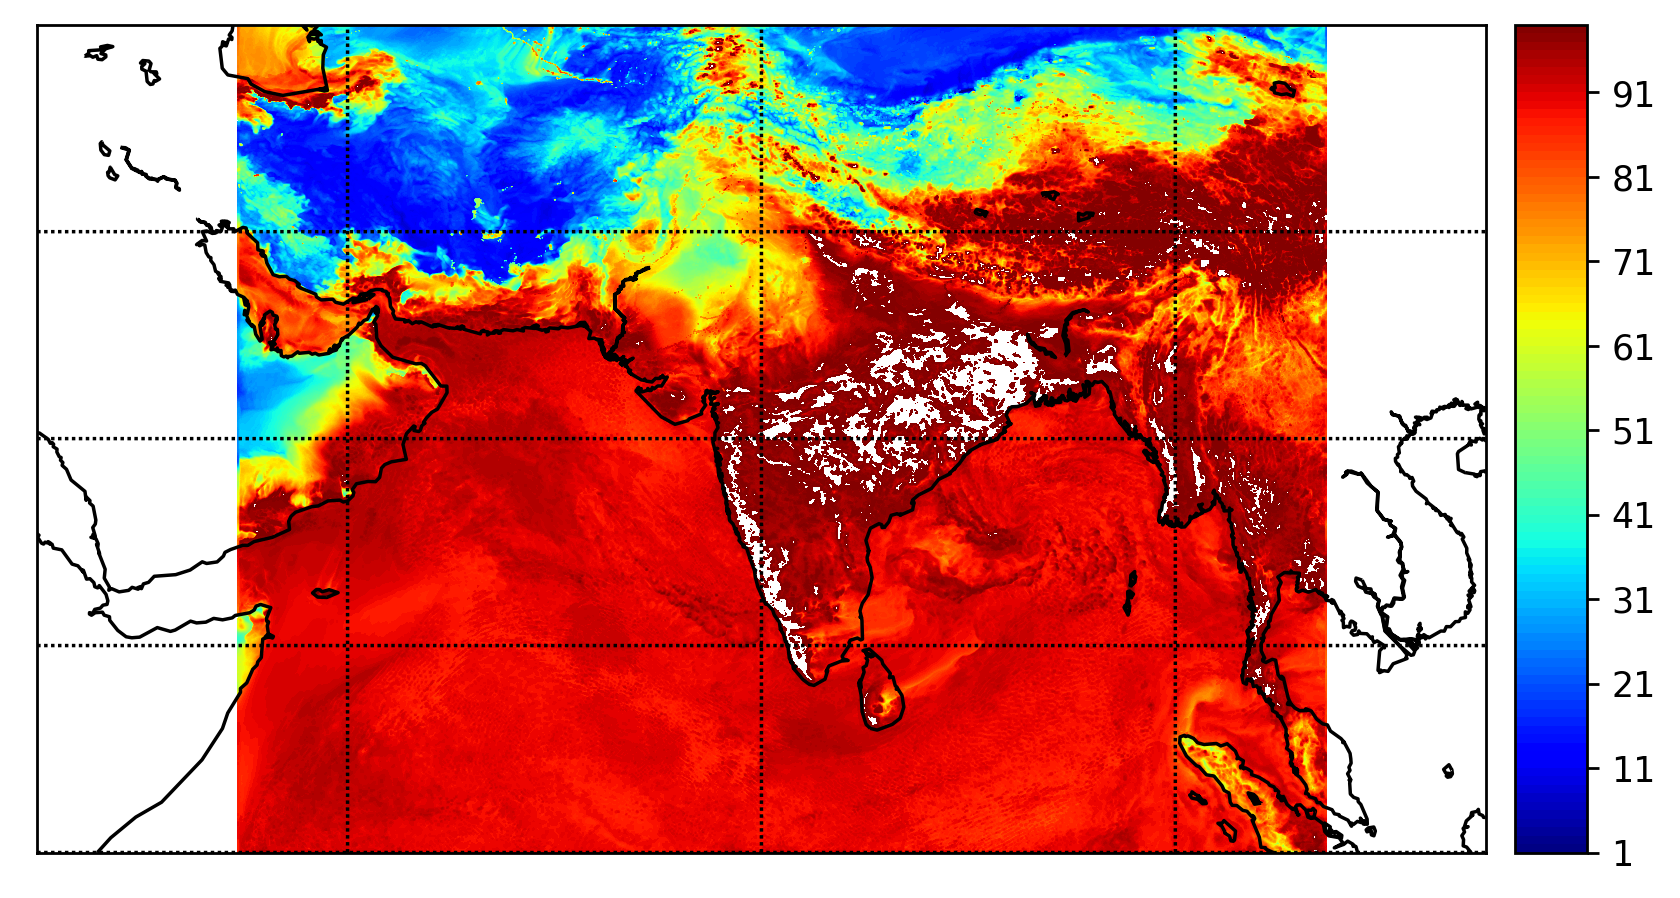

In [10]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=40,llcrnrlon=40,urcrnrlon=110,resolution='l')
fig=plt.figure(figsize=(8,8),dpi=250)
m.drawcoastlines()
clev=np.arange(data.min(),data.max(),1)
parallels=np.arange(0,40,10)
m.drawparallels(parallels)
meridians=np.arange(55,110,20)
m.drawmeridians(meridians)
p=m.contourf(lon0,lat0,data,clev,cmap='jet')
cbar=m.colorbar(p,location='right')
plt.show()